In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [173]:
df = pd.read_csv("/Users/tsy/Desktop/google/shilin/csv/test_1best_male.csv")

In [174]:
df

,spk,filename,sentence_confidence,min_word_confidence,wer,mer,wil
0,s5,lwws2p,0.758950,0.417193,0.333333,0.333333,0.555556
1,s5,bbwm1s,0.803436,0.647562,0.333333,0.333333,0.466667
2,s5,lgie7s,0.577283,0.217910,0.666667,0.571429,0.750000
3,s5,pgaj8n,0.865092,0.729069,0.500000,0.500000,0.750000
4,s5,lgir6p,0.823254,0.638431,0.333333,0.333333,0.555556
...,...,...,...,...,...,...,...
895,s12,srwa7n,0.873545,0.732746,0.166667,0.166667,0.305556
896,s12,swia4a,0.840774,0.732713,0.166667,0.166667,0.305556
897,s12,bgwn1n,0.908214,0.859664,0.333333,0.333333,0.555556
898,s12,swwb5p,0.898377,0.833374,0.166667,0.166667,0.305556


,sentence_confidence,min_word_confidence,wer,mer,wil
count,313.000000,313.000000,313.000000,313.000000,313.000000
mean,0.853095,0.703097,0.139510,0.139510,0.253994
std,0.064287,0.168244,0.061650,0.061650,0.113321
min,0.571836,0.216883,0.000000,0.000000,0.000000
25%,0.829544,0.666636,0.166667,0.166667,0.305556
50%,0.866500,0.763682,0.166667,0.166667,0.305556
75%,0.898918,0.808125,0.166667,0.166667,0.305556
max,0.954677,0.954677,0.166667,0.166667,0.305556


In [184]:
# a=df.loc[df['wer'] <= 0.2]
# a.describe()
b=df.groupby('wer')
b.describe()

sentence_confidence                                          \
                       count      mean       std       min       25%   
wer                                                                    
0.000000                19.0  0.879723  0.054802  0.719102  0.869880   
0.166667               132.0  0.845718  0.067665  0.579292  0.818912   
0.333333               216.0  0.821699  0.084244  0.541053  0.772486   
0.500000               218.0  0.810395  0.102879  0.394809  0.766712   
0.666667               182.0  0.785487  0.112226  0.378714  0.722495   
0.833333                99.0  0.746816  0.135990  0.316824  0.653652   
1.000000                33.0  0.708448  0.153118  0.221516  0.621335   
1.166667                 1.0  0.872747       NaN  0.872747  0.872747   

                                       min_word_confidence            ...  \
               50%       75%       max               count      mean  ...   
wer                                                                   ...   
0.000000  0.893459  0.911063  0.933209                19.0  0.730510  ...   
0.166667  0.860620  0.892951  0.954677               132.0  0.693828  ...   
0.333333  0.840881  0.881919  0.954677               216.0  0.633635  ...   
0.500000  0.829613  0.879995  0.954677               218.0  0.631289  ...   
0.666667  0.815879  0.867288  0.954677               182.0  0.602473  ...   
0.833333  0.778456  0.846788  0.954677                99.0  0.528700  ...   
1.000000  0.733195  0.820789  0.937666                33.0  0.493945  ...   
1.166667  0.872747  0.872747  0.872747                 1.0  0.746390  ...   

               mer              wil                                          \
               75%       max  count      mean       std       min       25%   
wer                                                                           
0.000000  0.000000  0.000000   19.0  0.000000  0.000000  0.000000  0.000000   
0.166667  0.166667  0.166667  132.0  0.304503  0.012089  0.166667  0.305556   
0.333333  0.333333  0.333333  216.0  0.535986  0.045443  0.333333  0.555556   
0.500000  0.500000  0.500000  218.0  0.712413  0.046693  0.619048  0.700000   
0.666667  0.666667  0.666667  182.0  0.845923  0.040529  0.666667  0.833333   
0.833333  0.833333  0.833333   99.0  0.952227  0.023862  0.812500  0.951389   
1.000000  1.000000  1.000000   33.0  0.997114  0.007891  0.976190  1.000000   
1.166667  0.875000  0.875000    1.0  0.979167       NaN  0.979167  0.979167   

                                        
               50%       75%       max  
wer                                     
0.000000  0.000000  0.000000  0.000000  
0.166667  0.305556  0.305556  0.305556  
0.333333  0.555556  0.555556  0.555556  
0.500000  0.750000  0.750000  0.750000  
0.666667  0.866667  0.866667  0.888889  
0.833333  0.958333  0.966667  0.972222  
1.000000  1.000000  1.000000  1.000000  
1.166667  0.979167  0.979167  0.979167  

[8 rows x 32 columns]

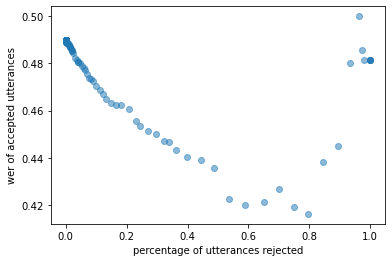

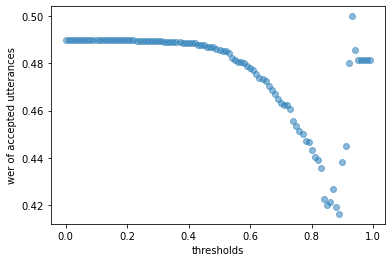

In [241]:
thresholds = []
rej_percents = []
acc_wer = []
threshold = 0
while threshold <= 1:
    thresholds.append(threshold)
    rej_percent = df[df['sentence_confidence'] < threshold].shape[0] / df.shape[0]
    accept = df[df['sentence_confidence'] > threshold]['wer'].to_list()
    if len(accept) != 0:
        wer_mean = sum(accept)/len(accept)
#     else:
#         wer_mean = 0.5
    acc_wer.append(wer_mean)
    rej_percents.append(rej_percent)
    threshold += 0.01


plt.scatter(rej_percents, acc_wer, alpha=0.5)
plt.xlabel('percentage of utterances rejected')
plt.ylabel('wer of accepted utterances')
plt.show()

plt.scatter(thresholds, acc_wer, alpha=0.5)
plt.xlabel('thresholds')
plt.ylabel('wer of accepted utterances')
plt.show()

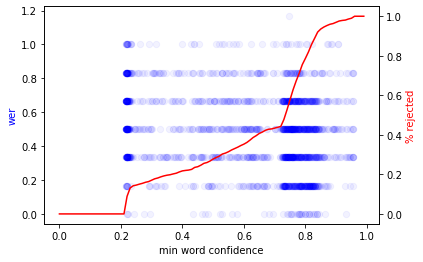

In [159]:
thresholds = []
rej_percents = []
threshold = 0
while threshold <= 1:
    thresholds.append(threshold)
    rej_percent = df[df['min_word_confidence'] < threshold].shape[0] / df.shape[0]
    rej_percents.append(rej_percent)
    threshold += 0.01

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.scatter(df['min_word_confidence'], df['wer'], s=40, alpha=0.05, color='b')
ax2.plot(thresholds, rej_percents, color='r')

ax1.set_xlabel('T_min word confidence')
ax1.set_ylabel('wer', color='b')
ax2.set_ylabel('% rejected', color='r')

plt.show()

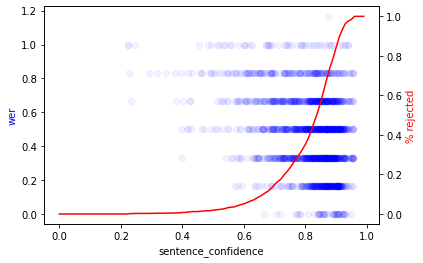

In [160]:
thresholds = []
rej_percents = []
threshold = 0
while threshold <= 1:
    thresholds.append(threshold)
    rej_percent = df[df['sentence_confidence'] < threshold].shape[0] / df.shape[0]
    rej_percents.append(rej_percent)
    threshold += 0.01

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.scatter(df['sentence_confidence'], df['wer'], s=40, alpha=0.05, color='b')
ax2.plot(thresholds, rej_percents, color='r')

ax1.set_xlabel('T_sentence_confidence')
ax1.set_ylabel('wer', color='b')
ax2.set_ylabel('% rejected', color='r')

plt.show()

In [175]:
dfn = pd.read_csv("/Users/tsy/Desktop/google/shilin/csv/test_nbest_male.csv")

In [176]:
dfn

,spk,filename,sentence_confidence,min_word_confidence,wer,mer,wil
0,s5,lwws2p,0.758950,u,0.333333,0.333333,0.555556
1,s5,bbwm1s,0.803436,u,0.333333,0.333333,0.466667
2,s5,lgie7s,0.700610,u,0.500000,0.428571,0.619048
3,s5,pgaj8n,0.865092,u,0.500000,0.500000,0.750000
4,s5,lgir6p,0.823254,u,0.333333,0.333333,0.555556
...,...,...,...,...,...,...,...
895,s12,srwa7n,0.873545,u,0.166667,0.166667,0.305556
896,s12,swia4a,0.840774,u,0.166667,0.166667,0.305556
897,s12,bgwn1n,0.908214,u,0.333333,0.333333,0.555556
898,s12,swwb5p,0.898377,u,0.166667,0.166667,0.305556


In [242]:
# b=dfn.loc[dfn['wer'] <= 0.2]
# b.describe()
b=dfn.groupby('wer')
b.describe()

sentence_confidence                                          \
                       count      mean       std       min       25%   
wer                                                                    
0.000000                19.0  0.880832  0.062306  0.647292  0.873837   
0.166667               132.0  0.853717  0.053959  0.674945  0.825405   
0.333333               226.0  0.825019  0.082829  0.487439  0.777784   
0.500000               219.0  0.826508  0.078537  0.571545  0.777693   
0.666667               173.0  0.803209  0.091752  0.378714  0.740871   
0.833333                98.0  0.770845  0.113789  0.420064  0.694526   
1.000000                32.0  0.758542  0.115654  0.483928  0.679956   
1.166667                 1.0  0.872747       NaN  0.872747  0.872747   

                                          mer            ...            \
               50%       75%       max  count      mean  ...       75%   
wer                                                      ...             
0.000000  0.893459  0.911063  0.933209   19.0  0.000000  ...  0.000000   
0.166667  0.864774  0.894284  0.954677  132.0  0.166667  ...  0.166667   
0.333333  0.843255  0.881595  0.954677  226.0  0.330805  ...  0.333333   
0.500000  0.836235  0.886423  0.954677  219.0  0.492825  ...  0.500000   
0.666667  0.823508  0.870849  0.954677  173.0  0.654005  ...  0.666667   
0.833333  0.782965  0.851113  0.954677   98.0  0.820275  ...  0.833333   
1.000000  0.770647  0.839833  0.937666   32.0  0.986607  ...  1.000000   
1.166667  0.872747  0.872747  0.872747    1.0  0.875000  ...  0.875000   

                      wil                                                    \
               max  count      mean       std       min       25%       50%   
wer                                                                           
0.000000  0.000000   19.0  0.000000  0.000000  0.000000  0.000000  0.000000   
0.166667  0.166667  132.0  0.304503  0.012089  0.166667  0.305556  0.305556   
0.333333  0.333333  226.0  0.538896  0.041310  0.404762  0.555556  0.555556   
0.500000  0.500000  219.0  0.710018  0.050186  0.500000  0.700000  0.750000   
0.666667  0.666667  173.0  0.845857  0.041405  0.666667  0.833333  0.866667   
0.833333  0.833333   98.0  0.950541  0.024550  0.812500  0.944444  0.958333   
1.000000  1.000000   32.0  0.997768  0.007051  0.976190  1.000000  1.000000   
1.166667  0.875000    1.0  0.979167       NaN  0.979167  0.979167  0.979167   

                              
               75%       max  
wer                           
0.000000  0.000000  0.000000  
0.166667  0.305556  0.305556  
0.333333  0.555556  0.555556  
0.500000  0.750000  0.750000  
0.666667  0.866667  0.888889  
0.833333  0.966667  0.972222  
1.000000  1.000000  1.000000  
1.166667  0.979167  0.979167  

[8 rows x 24 columns]

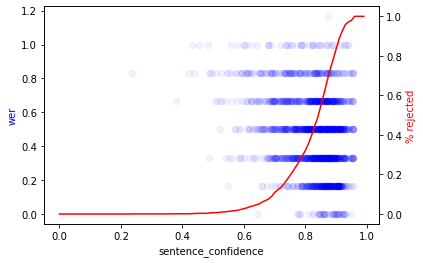

In [164]:
thresholds = []
rej_percents = []
threshold = 0
while threshold <= 1:
    thresholds.append(threshold)
    rej_percent = dfn[dfn['sentence_confidence'] < threshold].shape[0] / dfn.shape[0]
    rej_percents.append(rej_percent)
    threshold += 0.01

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.scatter(dfn['sentence_confidence'], dfn['wer'], s=40, alpha=0.05, color='b')
ax2.plot(thresholds, rej_percents, color='r')

ax1.set_xlabel('sentence_confidence')
ax1.set_ylabel('wer', color='b')
ax2.set_ylabel('% rejected', color='r')

plt.show()

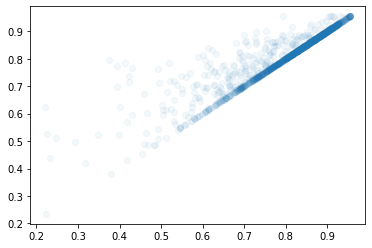

In [165]:
onebest_conf = df['sentence_confidence']
nbest_conf = dfn['sentence_confidence']
plt.scatter(onebest_conf, nbest_conf, alpha=0.05)

In [177]:
df.describe()

,sentence_confidence,min_word_confidence,wer,mer,wil
count,900.000000,900.000000,900.000000,900.000000,900.000000
mean,0.804053,0.621099,0.490000,0.482831,0.659317
std,0.107691,0.223377,0.236014,0.231698,0.232909
min,0.221516,0.216673,0.000000,0.000000,0.000000
25%,0.752970,0.460002,0.333333,0.333333,0.555556
50%,0.831976,0.733734,0.500000,0.500000,0.700000
75%,0.879779,0.785643,0.666667,0.666667,0.866667
max,0.954677,0.954677,1.166667,1.000000,1.000000


In [178]:
dfn.describe()

,sentence_confidence,wer,mer,wil
count,900.000000,900.000000,900.000000,900.000000
mean,0.818367,0.485556,0.478519,0.655414
std,0.088871,0.234996,0.230763,0.231333
min,0.378714,0.000000,0.000000,0.000000
25%,0.769570,0.333333,0.333333,0.555556
50%,0.837460,0.500000,0.500000,0.700000
75%,0.883297,0.666667,0.666667,0.866667
max,0.954677,1.166667,1.000000,1.000000
